### Causal diagrams - selection bias example
Showcase of how selection bias can arise. How association can be created without causal link

In [1]:
# Download data from:
# https://github.com/joy-shi1/simulated-data-selection-bias/
# Took example of Causal DAG 1

import numpy as np
import pandas as pd

#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/)
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes
from matplotlib.patches import Ellipse
#%matplotlib inline
import seaborn as sns; sns.set_context('notebook')

class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()

In [2]:
def beauty_histogram(samples, title="Beauty graph", xlim=(0, 1), ylim=(0, 1), bins=30):
    plt.figure(figsize=(12.5, 8))
    #histogram of the samples:

    (lower, upper) = (np.quantile(samples, 0.025),
                      np.quantile(samples, 0.975))

    plt.hist(samples, histtype='stepfilled', bins=bins, alpha=0.85,
             label="samples", color=TFColor[0], density=True)
    plt.axvline(lower, 0, 1, label='lower 95% quantile', linestyle='dashed')
    plt.axvline(upper, 0, 1, label='upper 95% quantile', linestyle='dashed')
    plt.axvline(np.mean(samples), label='mean', linestyle='dashed', color=TFColor[1])
    plt.legend(loc="upper left")
    plt.title(title)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("sample value")
    plt.show()

def beauty_plot(x, y, title="beauty_plot", xlim=(0,1), ylim=(0,1)):
    plt.figure(figsize=(12.5, 8))
    plt.plot(x, y, label=title, color=TFColor[0])
    plt.title(title)
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

def beauty_scatter(x, y, title="beauty_plot", xlim=(0,1), ylim=(0,1)):
    plt.figure(figsize=(12.5, 1.7))
    plt.scatter(x, y, label=title, color=TFColor[8])
    plt.title(title)
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

In [7]:
df = pd.read_csv("data/Simulated_DAG1.csv", usecols=['A', 'Y', 'C'])
df.head()

,A,Y,C
0,-0.407785,-1.209266,0
1,0.136224,-0.243852,1
2,0.134279,0.503778,1
3,-1.188130,0.102986,0
4,-2.022797,-0.059718,0


In [8]:
A, Y, C = df['A'].values, df['Y'].values, df['C'].values

c:\python\python38_data\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


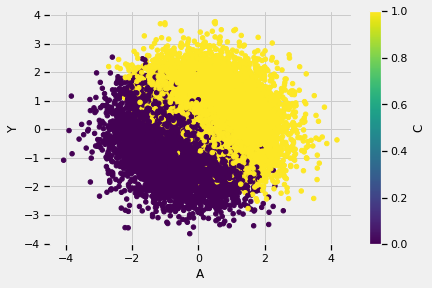

In [9]:
ax1 = df.plot.scatter(x='A',
                      y='Y',
                      c='C',
                      colormap='viridis')

In [10]:
np.corrcoef(A, Y)

array([[ 1.        , -0.00792652],
       [-0.00792652,  1.        ]])

Very low correllation of -0.008. Let's now condition on C:

In [12]:
A_cond_1, Y_cond_1 = A[C == 1], Y[C == 1]
A_cond_0, Y_cond_0 = A[C == 0], Y[C == 0]

Now we see the correllation between both groups: (-0.354 and -0.387)

In [14]:
np.corrcoef(A_cond_1, Y_cond_1)

array([[ 1.        , -0.35430602],
       [-0.35430602,  1.        ]])

In [15]:
np.corrcoef(A_cond_0, Y_cond_0)

array([[ 1.        , -0.38665769],
       [-0.38665769,  1.        ]])

And finally scatter plots for both cases:

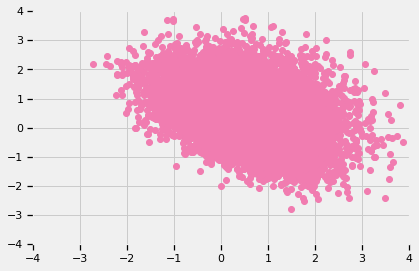

In [19]:
plt.scatter(A_cond_1, Y_cond_1, color=TFColor[4])
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.show()

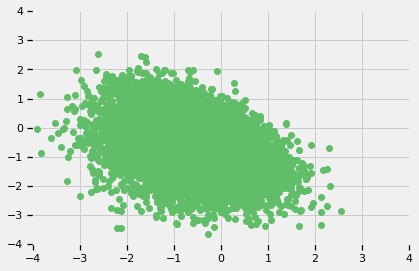

In [20]:
plt.scatter(A_cond_0, Y_cond_0, color=TFColor[2])
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.show()